# <font color='violet'> Deeper EDA on Review Text, Begin Feature Engineering

On data that was cleaned and lemmatized here: https://github.com/fractaldatalearning/psychedelic_efficacy/blob/main/notebooks/4-kl-studies-nlp.ipynb

In [13]:
# ! pip install nltk
! pip install nltk
# nltk.download('punkt')

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from tqdm import tqdm
from nltk.tokenizer import word_tokenize

ModuleNotFoundError: No module named 'nltk.tokenizer'

In [3]:
df = pd.read_csv('../data/interim/studies_lemmatized.csv').drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31559 entries, 0 to 31558
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rating         31559 non-null  float64
 1   condition      31559 non-null  object 
 2   review         31559 non-null  object 
 3   date           31451 non-null  object 
 4   drug0          31559 non-null  object 
 5   drug1          18992 non-null  object 
 6   drug2          32 non-null     object 
 7   drug3          23 non-null     object 
 8   drug4          12 non-null     object 
 9   drug5          11 non-null     object 
 10  drug6          7 non-null      object 
 11  drug7          5 non-null      object 
 12  drug8          3 non-null      object 
 13  drug9          2 non-null      object 
 14  drug10         2 non-null      object 
 15  drug11         2 non-null      object 
 16  drug12         2 non-null      object 
 17  drug13         2 non-null      object 
 18  drug14

<font color='violet'> How do the lengths compare for the review strings with just punctuation removed vs. the lemmatized strings?

In [4]:
df.review_len.mean()

473.5181406254951

In [5]:
df['lemm_len'] = [len(df.loc[row,'no_stops_lemm']) for row in range(len(df))]
df.lemm_len.mean()

250.39069679013912

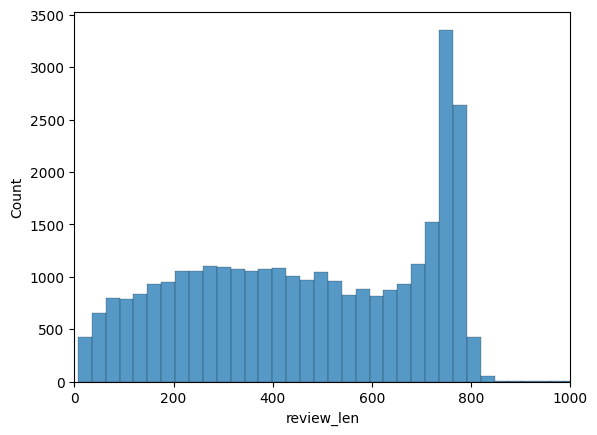

In [7]:
# Plot the distribution of review lengths. There are some outliers; zoom in a bit. 
sns.histplot(df.review_len).set(xlim=(0,1000))
plt.show()

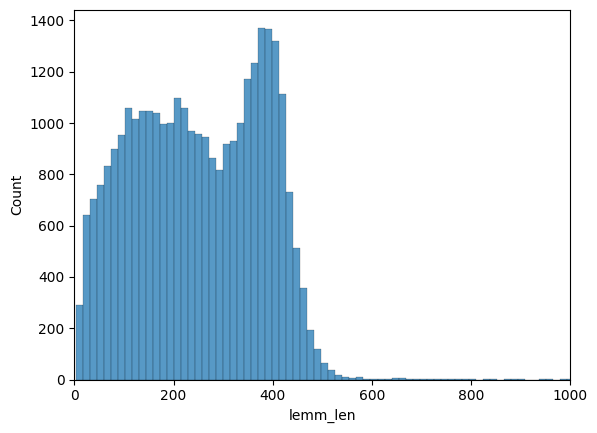

In [9]:
# Did lemmatizing and removing stopwords do anything to normalize the distribution of lengths?
sns.histplot(df.lemm_len).set(xlim=(0,1000))
plt.show()

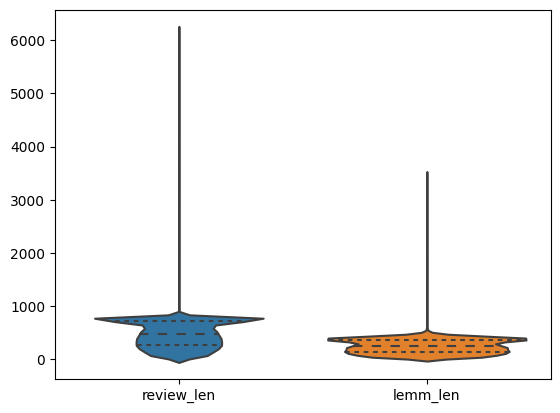

In [10]:
# The second peak looks a bit less extreme. Compare distributions of lengths side by side. 
sns.violinplot(df[['review_len', 'lemm_len']], inner='quartile')
plt.show()

Average complexity of perfect reviews appears to be very slightly lower, but my impression is that text complexity doesn't vary greatly by rating. 

Use the lemmatized text for this in order to draw from a smaller, more normalized set of words. 

In [11]:
# Get counter of words and find the most frequent.
word_counter = Counter(word_tokenize(' '.join(df['no_stops_lemm'].tolist())))
most_common_words = dict(word_counter.most_common(20))
most_common_words

NameError: name 'word_tokenize' is not defined

In [ ]:
# What is the relative distribution of these strings across lemmatized reviews?
most_common_words_df = pd.DataFrame(data = most_common_words.items(), 
                                     columns=['lemma', 'frequency'])
sns.barplot(data=most_common_words_df, x='frequency', y='lemma')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Get bigrams. This will be easiest if I first remove excessive spaces between lemmas.
for row in tqdm(range(len(df))):
    string_to_strip = df.loc[row, 'no_stops_lemm']
    stripped = " ".join(string_to_strip.split())
    df.loc[row,'no_stops_lemm'] = stripped
    
# Check to see if this worked
len(df[df.no_stops_lemm.str.find('  ')!=-1])

In [ ]:
list_of_strings = df['no_stops_lemm'].tolist()
bigrams = [x for y in list_of_strings for x in zip(y.split(" ")[:-1], y.split(" ")[1:])]
len(bigrams)

In [ ]:
bigrams[0:5]

In [ ]:
# Use counter to find most common bigrams. 
bigram_counter = Counter(bigrams)
most_common_bigrams = dict(bigram_counter.most_common(20))
most_common_bigrams

In [ ]:
# Visualize bigrams
most_common_bigrams_df = pd.DataFrame(data = most_common_bigrams.items(), 
                                     columns=['bigram', 'frequency'])
sns.barplot(data=most_common_bigrams_df, x='frequency', y='bigram')
plt.xticks(rotation=90)
plt.show()

Some of these are just quantities, but some definitely seem associated with sentiments. See if trigrams seem to be a worthwile thing to build into eventual feature engineering 

In [ ]:
trigrams = []

for row in tqdm(range(len(df))):
    string_to_work_w = df.loc[row, 'no_stops_lemm']
    words_list = string_to_work_w.split(" ")
    these_trigrams = []
    for i in range(0 , len(words_list) - 2):
        trigram = words_list[i] + " " + words_list[i+1] + " " + words_list[i + 2]
        these_trigrams.append(trigram)
    trigrams += these_trigrams

len(trigrams)

In [ ]:
trigrams[:5]

In [ ]:
# Get counter for trigrams & Visualize
trigrams_counter = Counter(trigrams)
most_common_trigrams = dict(trigrams_counter.most_common(20))

most_common_trigrams_df = pd.DataFrame(data = most_common_trigrams.items(), 
                                     columns=['trigram', 'frequency'])
sns.barplot(data=most_common_trigrams_df, x='frequency', y='trigram')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Fascinating. Repeat for quadgrams
quadgrams = []

for row in tqdm(range(len(df))):
    string_to_work_w = df.loc[row, 'no_stops_lemm']
    words_list = string_to_work_w.split(" ")
    these_quadgrams = []
    for i in range(0 , len(words_list) - 3):
        quadgram = (words_list[i] + " " + words_list[i+1] + " " + words_list[i + 2] + " " + 
                    words_list[i + 3])
        these_quadgrams.append(quadgram)
    quadgrams += these_quadgrams

# Get counter and visualize
quadgrams_counter = Counter(quadgrams)
most_common_quadgrams = dict(quadgrams_counter.most_common(20))

most_common_quadgrams_df = pd.DataFrame(data = most_common_quadgrams.items(), 
                                     columns=['quadgram', 'frequency'])
sns.barplot(data=most_common_quadgrams_df, x='frequency', y='quadgram')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# And quintgrams
quintgrams = []

for row in tqdm(range(len(df))):
    string_to_work_w = df.loc[row, 'no_stops_lemm']
    words_list = string_to_work_w.split(" ")
    these_quintgrams = []
    for i in range(0 , len(words_list) - 4):
        quintgram = (words_list[i] + " " + words_list[i+1] + " " + words_list[i + 2] + " " + 
                     words_list[i + 3] + " " + words_list[i + 4])
        these_quintgrams.append(quintgram)
    quintgrams += these_quintgrams

# Get counter and visualize
quintgrams_counter = Counter(quintgrams)
most_common_quintgrams = dict(quintgrams_counter.most_common(20))

most_common_quintgrams_df = pd.DataFrame(data = most_common_quintgrams.items(), 
                                     columns=['quintgram', 'frequency'])
sns.barplot(data=most_common_quintgrams_df, x='frequency', y='quintgram')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Lol, purely out of curiosity, what's the greatest number of ! somebody used in a row
df[df.no_stops_lemm.str.find('!!!!!!')!=-1] # 6 !

In [ ]:
df[df.no_stops_lemm.str.find('!!!!!!!')!=-1] # 7 !

The quintgram stopped revealing anything additional of much interest as far as I'm concerned. Seeing the distrubuion of the tri- and quad-grams, though, is super interesting. Of course, ngrams with large values of n lead to overfitting if used as features during modeling. And overfitting is definitely something I want to avoid since I'll want to apply this model to new data that may have fairly different sorts of words than this dataset. But it doesn't seem impossible that any narrative about any drug might contain the phrase "feel like old self" and that the phrase could be correlated with sentiment. So I'll need to play around with ngrams some more and decide what role they should play in my eventual model. 

There are some interesting trends to notice through all this and questions that arise. For example, is the model going to find it helpful to distinguish between 3 !!!, 4 !!!! and 5 !!!!!? Or are those likely expressing something very similar in terms of sentiment and better reduced down to just 3 !!! in order to reduce noise? Dig into these ngram visualizations further as I get into feature engineering. 

<font color='violet'> Are there rare but potentially important words? 

In [ ]:
least_common_lemmas = word_counter.most_common()[-20:-1]
least_common_lemmas

In [ ]:
# Analyze these here. 

Move into feature engineering. I'll start with creating columns to hold information about each review's sentiment score. I'll use TextBlob because it returns easy-to-interpret sentiment scores that include both sentiment poliarity and subjectivity. Subjectivity seems particular relevant in this context because the typical subjectivitiy of scrubbed experience reports may differ from that of reviews contained in this current dataset. I can't know for sure until I explore, but I'd imagine some experience reports try to simply convey what happened when somebody took a drug, while others are highly subjective and mostly share opinions about how the experience went. In this current dataset, the reviews may share straightforward experiences but are probably more so considered explanations for why a particular rating was given. So, it would be great to have the ability to differentiate by more-and-less subjective reviews.

Options for preprocessing:
- Consider using sklearn.feature_extraction.text CountVectorizer to create a column for each ngram. Or, instead of counting the number of every single ngram, extract the count of key words/ngrams in each review. Can use NLTK to filter out rare ngrams or do pmi (comparing ngrams) 
- Assign words (or even ngrams?) in reviews tfidf scores using TfidfVectorizerin order to add weight to more important words for predictive purposes. (Use case: large corpus, want to simplify them into fewer words for application)
- Generate word embeddings using spacy's pretrained model: use a larger spacy model if using word embedding. Generate a word vector for each word. Check out "Beyond n-grams: word embeddings" lesson in Data Camp course Feature Engineering for NLP in Python. Or use WordVec. (Use case: working with word nuances, relationships, semantics)
- Lots of good tips in this article: https://medium.com/geekculture/nlp-text-pre-processing-and-feature-engineering-python-69338fa0372e
- OR: https://www.kaggle.com/code/tanulsingh077/deep-learning-for-nlp-zero-to-transformers-bert/notebook

    
Other resources:
- re: using spacy's visualizer: https://medium.com/acing-ai/visualizations-in-natural-language-processing-2ca60dd34ce
- Come back to this resource used in the previous notebook; it also contains info re: visualizing word embeddings: Still especially interested in digging deeper with visualizing word embeddings: https://medium.com/plotly/nlp-visualisations-for-clear-immediate-insights-into-text-data-and-outputs-9ebfab168d5b
    

I used these resources as references for some of the code in this notebook and would like to return to them again in the future:
- Drew lots of tips from this article. Still especially interested in digging deeper with visualizing word embeddings: https://medium.com/plotly/nlp-visualisations-for-clear-immediate-insights-into-text-data-and-outputs-9ebfab168d5b
- Contains code for creating list of ngrams with their frquency, wish I'd read this before doing what I did above: https://www.kaggle.com/code/sainathkrothapalli/nlp-visualisation-guide    

In [ ]:
df.to_csv('../data/interim/studies_w_sentiment.csv')